* Analyze the data
* Split data into training and test-data
* Create a decision tree, what is the depth of the tree, how many leaves
* Why do the training and testscore differ
* What are the maximum amount of branches from a node


Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

#### Importing dataset + dataset overview

In [2]:
wine_df = pd.read_csv('../../Datasets/WineQT.csv')

In [3]:
wine_df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1584
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,1587
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1591
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
wine_df.shape

(1143, 13)

Relation of attributes overview


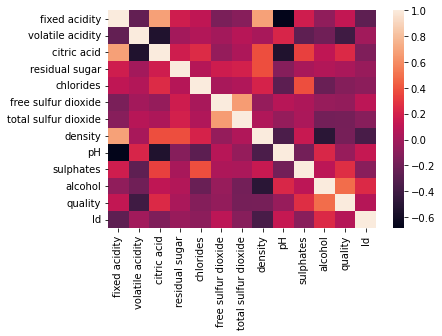

In [5]:
wine_heat = sns.heatmap(wine_df.corr())

Controlling whether or not datapoints are unique

In [6]:
check_double_id = wine_df.duplicated(subset=['Id'])
if True in check_double_id.values:
    print('Contains doubles')
else:
    print('The datapoints are unique')

The datapoints are unique


## Distribution of attributes:

#### Fixed acidity:

fixed acidity, max: 15.9
fixed acidity, min: 4.6


Text(0.5, 1.0, 'Fixed acidity distribution')

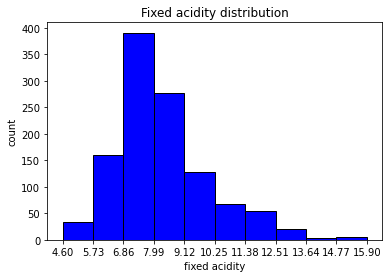

In [7]:
print(f"fixed acidity, max: {max(wine_df['fixed acidity'])}")
print(f"fixed acidity, min: {min(wine_df['fixed acidity'])}")
maxvalue = round(max(wine_df['fixed acidity']),1)
minvalue = round(min(wine_df['fixed acidity']),1)
bin_edges = [minvalue]
step = (maxvalue-minvalue)/10

edge_to_add = minvalue
while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    bin_edges.append(edge_to_add)

plt.figure()
plt.hist(wine_df['fixed acidity'], color = 'b', edgecolor = 'k', bins = bin_edges)
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('Fixed acidity distribution')

#### Volatile acidity

1.58
0.12
[0.12, 0.266, 0.412, 0.558, 0.704, 0.85, 0.996, 1.142, 1.288, 1.434, 1.58]


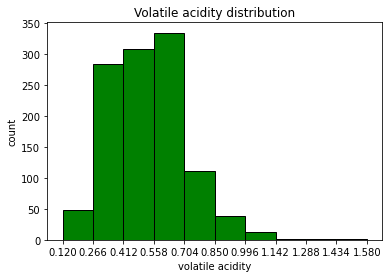

In [8]:
print(max(wine_df['volatile acidity']))
print(min(wine_df['volatile acidity']))
maxvalue = max(wine_df['volatile acidity'])
minvalue = min(wine_df['volatile acidity'])

step = (maxvalue-minvalue)/10

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,3)
    bin_edges.append(edge_to_add)

    
plt.figure()
plt.hist(wine_df['volatile acidity'], color = 'g', edgecolor = 'k', bins = bin_edges)
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('Volatile acidity distribution')
print(bin_edges)

#### Citric acid

1.0
0.0
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Text(0.5, 1.0, 'citric acid distribution')

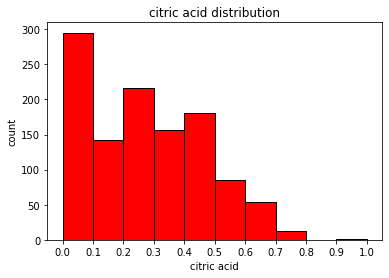

In [9]:
print(max(wine_df['citric acid']))
print(min(wine_df['citric acid']))
maxvalue = max(wine_df['citric acid'])
minvalue = min(wine_df['citric acid'])

step = (maxvalue-minvalue)/10

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,1)
    bin_edges.append(edge_to_add)
print(bin_edges)
plt.figure()
plt.hist(wine_df['citric acid'], color = 'r', edgecolor = 'k', bins = bin_edges)
plt.xlabel('citric acid')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('citric acid distribution')

#### residual sugar

15.5
0.9
[0.9, 2.36, 3.82, 5.28, 6.74, 8.2, 9.66, 11.12, 12.58, 14.04, 15.5]


Text(0.5, 1.0, 'residual sugar distribution')

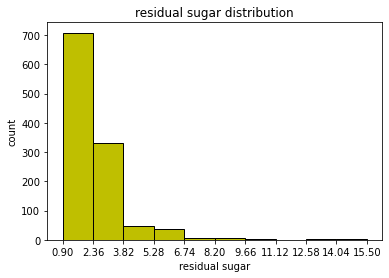

In [10]:
print(max(wine_df['residual sugar']))
print(min(wine_df['residual sugar']))
maxvalue = max(wine_df['residual sugar'])
minvalue = min(wine_df['residual sugar'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
print(bin_edges)
plt.figure()
plt.hist(wine_df['residual sugar'], color = 'y', edgecolor = 'k', bins = bin_edges)
plt.xlabel('residual sugar')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('residual sugar distribution')

#### Chlorides

0.611
0.012


Text(0.5, 1.0, 'chlorides distribution')

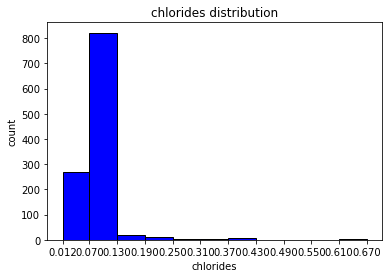

In [11]:
print(max(wine_df['chlorides']))
print(min(wine_df['chlorides']))
maxvalue = max(wine_df['chlorides'])
minvalue = min(wine_df['chlorides'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['chlorides'], color = 'b', edgecolor = 'k', bins = bin_edges)
plt.xlabel('chlorides')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('chlorides distribution')

#### Free sulfur dioxide

68.0
1.0


Text(0.5, 1.0, 'free sulfur dioxide distribution')

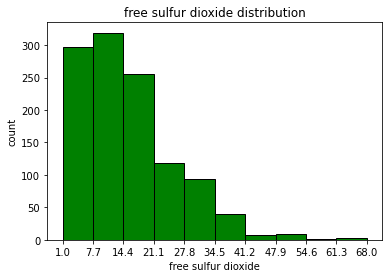

In [12]:
print(max(wine_df['free sulfur dioxide']))
print(min(wine_df['free sulfur dioxide']))
maxvalue = max(wine_df['free sulfur dioxide'])
minvalue = min(wine_df['free sulfur dioxide'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['free sulfur dioxide'], color = 'g', edgecolor = 'k', bins = bin_edges)
plt.xlabel('free sulfur dioxide')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('free sulfur dioxide distribution')

#### Total sulfur dioxide

289.0
6.0


Text(0.5, 1.0, 'total sulfur dioxide distribution')

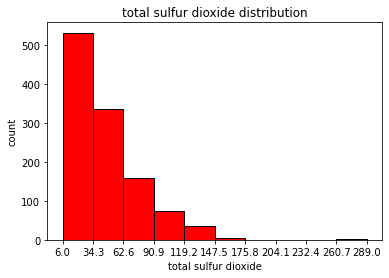

In [13]:
print(max(wine_df['total sulfur dioxide']))
print(min(wine_df['total sulfur dioxide']))
maxvalue = max(wine_df['total sulfur dioxide'])
minvalue = min(wine_df['total sulfur dioxide'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['total sulfur dioxide'], color = 'r', edgecolor = 'k', bins = bin_edges)
plt.xlabel('total sulfur dioxide')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('total sulfur dioxide distribution')

#### density


1.00369
0.99007


Text(0.5, 1.0, 'density distribution')

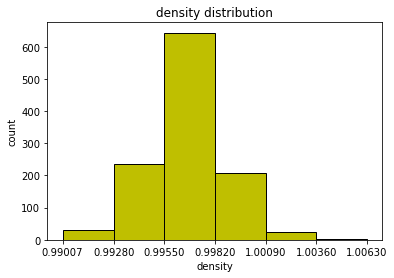

In [14]:
print(max(wine_df['density']))
print(min(wine_df['density']))
maxvalue = max(wine_df['density'])
minvalue = min(wine_df['density'])

step = round(((maxvalue-minvalue)/5),4)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,4)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['density'], color = 'y', edgecolor = 'k', bins = bin_edges)
plt.xlabel('density')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('density distribution')

#### Sulfur dioxide

4.01
2.74


Text(0.5, 1.0, 'pH distribution')

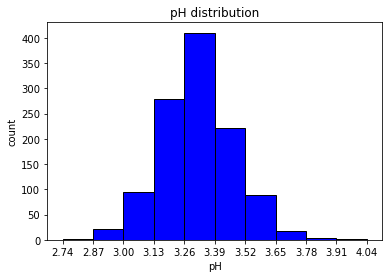

In [15]:
print(max(wine_df['pH']))
print(min(wine_df['pH']))
maxvalue = max(wine_df['pH'])
minvalue = min(wine_df['pH'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['pH'], color = 'b', edgecolor = 'k', bins = bin_edges)
plt.xlabel('pH')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('pH distribution')

#### Sulphates

2.0
0.33


Text(0.5, 1.0, 'sulphates distribution')

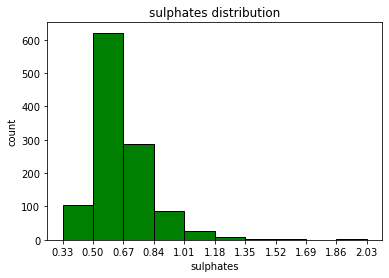

In [16]:
print(max(wine_df['sulphates']))
print(min(wine_df['sulphates']))
maxvalue = max(wine_df['sulphates'])
minvalue = min(wine_df['sulphates'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['sulphates'], color = 'g', edgecolor = 'k', bins = bin_edges)
plt.xlabel('sulphates')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('sulphates distribution')

14.9
8.4


Text(0.5, 1.0, 'alcohol distribution')

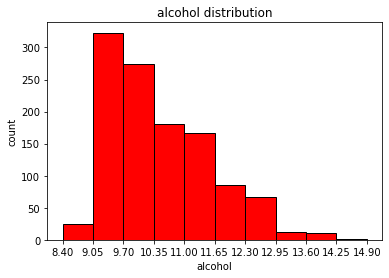

In [17]:
print(max(wine_df['alcohol']))
print(min(wine_df['alcohol']))
maxvalue = max(wine_df['alcohol'])
minvalue = min(wine_df['alcohol'])

step = round(((maxvalue-minvalue)/10),2)

bin_edges = [minvalue]

edge_to_add = minvalue

while(edge_to_add < maxvalue):
    edge_to_add = edge_to_add + step
    edge_to_add = round(edge_to_add,2)
    bin_edges.append(edge_to_add)
    
plt.figure()
plt.hist(wine_df['alcohol'], color = 'r', edgecolor = 'k', bins = bin_edges)
plt.xlabel('alcohol')
plt.ylabel('count')
plt.xticks(bin_edges)
plt.title('alcohol distribution')

#### Quality

8
3


Text(0.5, 1.0, 'quality distribution')

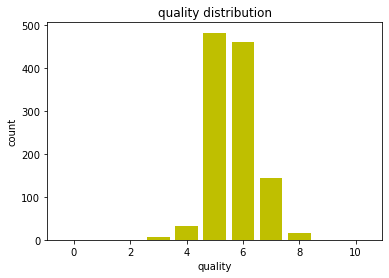

In [18]:
print(max(wine_df['quality']))
print(min(wine_df['quality']))
quality_range = []
maxQuality = 10
[quality_range.append(i) for i in range(maxQuality+1)]

qualityRatings = []

for i in range(maxQuality+1):
    if i in wine_df['quality'].values:
        numberOfVotes = wine_df['quality'].value_counts()[i]
        qualityRatings.append(numberOfVotes)
    else:
        qualityRatings.append(0)
fig = plt.figure()
plt.bar(quality_range, qualityRatings, color = 'y')
plt.ylabel('count')
plt.xlabel('quality')
plt.title('quality distribution')

## Splitting into test and training datasets

#### Removing the ID parameter before split since it holds no effect on the wine quality

In [19]:
wine_df_mod = wine_df.drop(columns = 'Id')
wine_df_mod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Split into X (input) och y(output)

In [20]:
X = wine_df.drop(columns =['Id','quality'] )
y = wine_df['quality']

#### Importing DecisionTree classifier and creating the model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11)
wine_clf.fit(X_train,y_train)
print(f"Dimension of training data: {y_train.shape}")
print(f"Dimension of test data: {y_test.shape}")

Dimension of training data: (857,)
Dimension of test data: (286,)


#### Testscore

In [22]:
test_score = wine_clf.score(X_test,y_test)

print(f"The score for test values is: {test_score}")

The score for test values is: 0.5174825174825175


#### Tree depth

In [23]:
wine_clf.get_depth()

21

#### Amount of leaves

In [24]:
wine_clf.get_n_leaves()

236

#### Attribute weighting

In [25]:
wine_clf.feature_importances_
attribute_list = list(X)
attribute_importance_list = []
for i in range(len(attribute_list)):
    attribute_importance = str(attribute_list[i]) + ': ' + str(wine_clf.feature_importances_[i])
    attribute_importance_list.append(attribute_importance)
show_importance = "\n".join(attribute_importance_list)
print(show_importance)

fixed acidity: 0.09424395522822764
volatile acidity: 0.0973827214951384
citric acid: 0.06543472121117348
residual sugar: 0.050624619797428216
chlorides: 0.0939297174966856
free sulfur dioxide: 0.05605454942012239
total sulfur dioxide: 0.09772751779541414
density: 0.07681364321189774
pH: 0.06764043190019743
sulphates: 0.1253306090777502
alcohol: 0.17481751336596477


#### Example of hyperparameter tuning through "max_depth"

In [26]:
X = wine_df.drop(columns =['Id','quality'] )
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 12)
wine_clf.fit(X_train,y_train)
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")

Test score: 0.5559440559440559
Train score: 0.9603267211201867


#### Plottning of complete tree:

In [27]:
from sklearn.tree import plot_tree

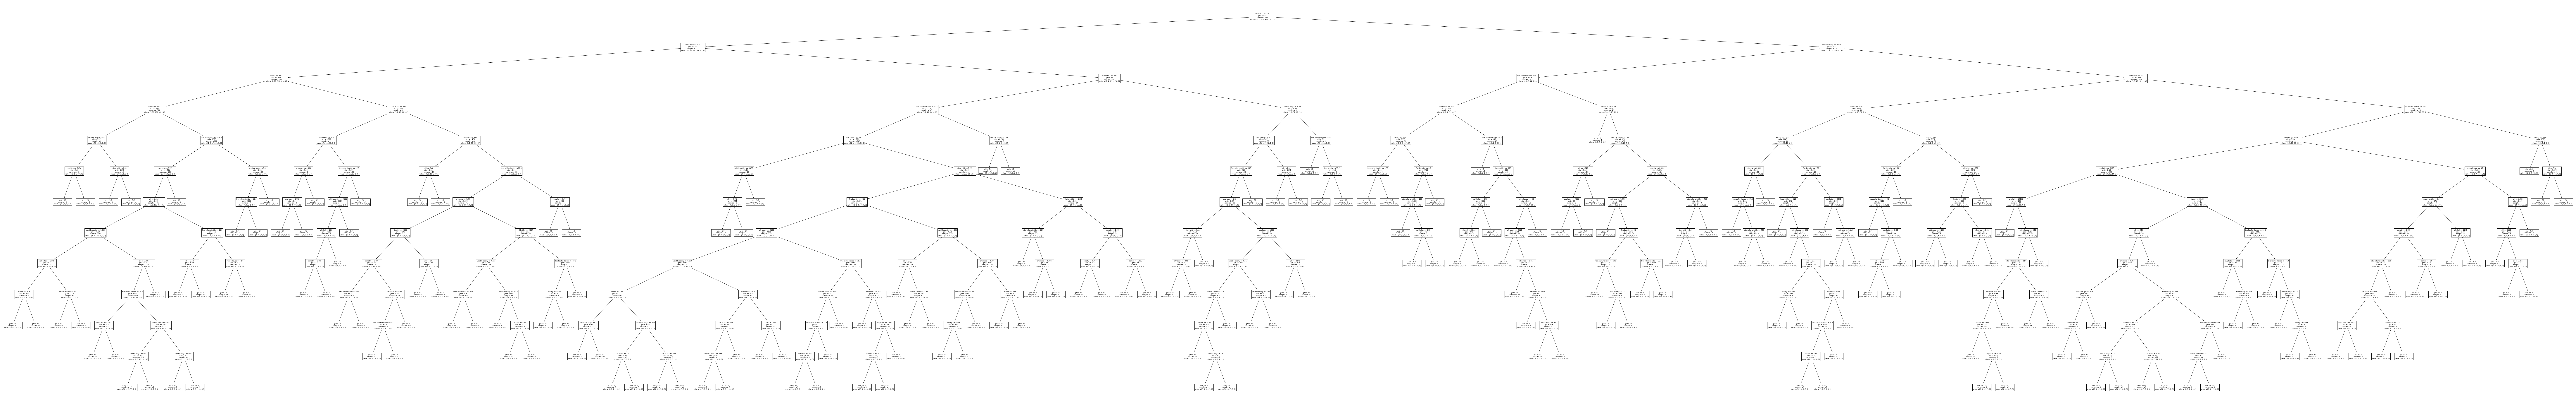

In [28]:
plt.figure(figsize = [250,40])
test_tree = plot_tree(wine_clf, fontsize= 8,feature_names = list(X))
plt.savefig('test_tree.png')

## Improving model quality

Feature importance: <br>
fixed acidity: 0.07640369183106657 <br>
volatile acidity: 0.1264675653417202 <br>
citric acid: 0.05065111747309669<br>
residual sugar: 0.05565049949053543<br>
chlorides: 0.06422615981460139<br>
free sulfur dioxide: 0.050923451956307104<br>
total sulfur dioxide: 0.10089768932920393<br>
density: 0.06549727694326345<br>
pH: 0.10182844742324144<br>
sulphates: 0.11824573785089239<br>
alcohol: 0.18920836254607143<br>

As seen above residual sugar, citric acid, free sulfur, density, fixed acidity are low quality attributes for predicting the quality of the wine. Below these are removed and the model performance is reevaluated.


### Hyperparamter tuning

By removing some of the attributes we can get a better performing model.

In [29]:
X = wine_df.drop(columns =['Id','quality','fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'density'] )
y = wine_df['quality']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 10 ,min_samples_split = 10)
wine_clf.fit(X_train,y_train)

print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"Depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    residual sugar  chlorides  total sulfur dioxide    pH  sulphates  alcohol
0             1.9      0.076                  34.0  3.51       0.56      9.4
1             2.6      0.098                  67.0  3.20       0.68      9.8
2             2.3      0.092                  54.0  3.26       0.65      9.8
3             1.9      0.075                  60.0  3.16       0.58      9.8
4             1.9      0.076                  34.0  3.51       0.56      9.4
Test score: 0.5944055944055944
Train score: 0.793465577596266
Depth: 10
Parameter weight: [0.06943076 0.08449179 0.16158831 0.17804528 0.18107034 0.3253735 ]


### Removing the worst attribute, one at the time.

#### Removal of citric acid

In [31]:
X = wine_df.drop(columns =['Id','quality','citric acid'] )
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 10 ,min_samples_split = 10)
wine_clf.fit(X_train,y_train)
print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
4            7.4              0.70             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
Test score: 0.527972027972028
Train score: 0.8249708284714119
depth: 10
Parameter w

In [32]:
X = wine_df.drop(columns =['Id','quality','citric acid', 'residual sugar'] )
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)
wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 10 ,min_samples_split = 10)
wine_clf.fit(X_train,y_train)

print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    fixed acidity  volatile acidity  chlorides  free sulfur dioxide  \
0            7.4              0.70      0.076                 11.0   
1            7.8              0.88      0.098                 25.0   
2            7.8              0.76      0.092                 15.0   
3           11.2              0.28      0.075                 17.0   
4            7.4              0.70      0.076                 11.0   

   total sulfur dioxide  density    pH  sulphates  alcohol  
0                  34.0   0.9978  3.51       0.56      9.4  
1                  67.0   0.9968  3.20       0.68      9.8  
2                  54.0   0.9970  3.26       0.65      9.8  
3                  60.0   0.9980  3.16       0.58      9.8  
4                  34.0   0.9978  3.51       0.56      9.4  
Test score: 0.527972027972028
Train score: 0.8156359393232205
depth: 10
Parameter weight: [0.11236533 0.09007771 0.10423137 0.06671926 0.09097496 0.07537762
 0.05604852 0.16237306 0.24183217]


#### Removal of "Free sulfur dioxide"

In [33]:
X = wine_df.drop(columns =['Id','quality','citric acid', 'residual sugar','free sulfur dioxide'] )
y = wine_df['quality']


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)
wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 10 ,min_samples_split = 10)
wine_clf.fit(X_train,y_train)

print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"Depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    fixed acidity  volatile acidity  chlorides  total sulfur dioxide  density  \
0            7.4              0.70      0.076                  34.0   0.9978   
1            7.8              0.88      0.098                  67.0   0.9968   
2            7.8              0.76      0.092                  54.0   0.9970   
3           11.2              0.28      0.075                  60.0   0.9980   
4            7.4              0.70      0.076                  34.0   0.9978   

     pH  sulphates  alcohol  
0  3.51       0.56      9.4  
1  3.20       0.68      9.8  
2  3.26       0.65      9.8  
3  3.16       0.58      9.8  
4  3.51       0.56      9.4  
Test score: 0.583916083916084
Train score: 0.8179696616102684
Depth: 10
Parameter weight: [0.10442595 0.07949849 0.1251464  0.13345521 0.08705622 0.06881802
 0.1508464  0.25075332]


#### Removal of "pH"

In [34]:
X = wine_df.drop(columns =['Id','quality','citric acid', 'residual sugar','free sulfur dioxide', 'pH'] )
y = wine_df['quality']


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 10 ,min_samples_split = 10)
wine_clf.fit(X_train,y_train)
print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"Depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    fixed acidity  volatile acidity  chlorides  total sulfur dioxide  density  \
0            7.4              0.70      0.076                  34.0   0.9978   
1            7.8              0.88      0.098                  67.0   0.9968   
2            7.8              0.76      0.092                  54.0   0.9970   
3           11.2              0.28      0.075                  60.0   0.9980   
4            7.4              0.70      0.076                  34.0   0.9978   

   sulphates  alcohol  
0       0.56      9.4  
1       0.68      9.8  
2       0.65      9.8  
3       0.58      9.8  
4       0.56      9.4  
Test score: 0.6083916083916084
Train score: 0.8074679113185531
Depth: 10
Parameter weight: [0.10665228 0.09123425 0.11008453 0.15354205 0.0977444  0.17618415
 0.26455834]


Final result is: 0.608

## Using GridSearchCV fto find the best combination of hyperparametrar. 


GridsearchCV does a cross-validation of the model-performance by creating test and training samples within the trainingdata(in this case 5 splits) and the model with the best mean performance over these splits will be assumed to be the best performing model. This method is a more fair way to compare modelperformance since the random_state value might be benefitial to our initial test/train split, this cross-validation method will produce a more stable model.

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
X = wine_df.drop(columns = ['Id','quality','citric acid', 'residual sugar','free sulfur dioxide', 'pH'])
y = wine_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

wine_clf = DecisionTreeClassifier(random_state = 11)
wine_clf.fit(X_train,y_train)

max_depth_array = []
min_samples_array = []

depth_range = range(2,21)
max_depth_array.extend(depth_range)
min_samples_split_range = range(2,26)
min_samples_array.extend(min_samples_split_range)

hyper_params = {
    'max_depth': max_depth_array,
    'min_samples_split': min_samples_array,
    'criterion': ['gini','entropy']
}

grid_test = GridSearchCV(estimator = wine_clf, param_grid = hyper_params )

grid_test.fit(X_train,y_train)

score_df = pd.DataFrame(grid_test.cv_results_)
score_df.head()

print(grid_test.best_estimator_)
print(grid_test.best_score_)

score_df.nlargest(5,"mean_test_score")

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=11)
0.5776213790289677


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
504,0.009786,0.000737,0.002835,0.000763,entropy,4,2,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.55814,0.575581,0.596491,0.590643,0.567251,0.577621,0.014261,1
505,0.008818,0.000412,0.003190,0.000373,entropy,4,3,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.55814,0.575581,0.596491,0.590643,0.567251,0.577621,0.014261,1
506,0.009004,0.000045,0.002831,0.000427,entropy,4,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.55814,0.575581,0.596491,0.590643,0.567251,0.577621,0.014261,1
507,0.011092,0.001518,0.004111,0.000941,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.55814,0.575581,0.596491,0.590643,0.567251,0.577621,0.014261,1
508,0.007924,0.001554,0.002564,0.000847,entropy,4,6,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.55814,0.575581,0.596491,0.590643,0.567251,0.577621,0.014261,1


In [38]:
wine_clf = DecisionTreeClassifier(random_state = 11, max_depth = 4 ,min_samples_split = 2)
wine_clf.fit(X_train,y_train)
print(f"X: {X.head()}")
print(f"Test score: {wine_clf.score(X_test,y_test)}")
print(f"Train score: {wine_clf.score(X_train,y_train)}")
print(f"Depth: {wine_clf.get_depth()}")

print(f"Parameter weight: {wine_clf.feature_importances_}")

X:    fixed acidity  volatile acidity  chlorides  total sulfur dioxide  density  \
0            7.4              0.70      0.076                  34.0   0.9978   
1            7.8              0.88      0.098                  67.0   0.9968   
2            7.8              0.76      0.092                  54.0   0.9970   
3           11.2              0.28      0.075                  60.0   0.9980   
4            7.4              0.70      0.076                  34.0   0.9978   

   sulphates  alcohol  
0       0.56      9.4  
1       0.68      9.8  
2       0.65      9.8  
3       0.58      9.8  
4       0.56      9.4  
Test score: 0.5769230769230769
Train score: 0.6546091015169195
Depth: 4
Parameter weight: [0.03003618 0.08393084 0.09498533 0.10547004 0.         0.2035239
 0.48205371]
